In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
ev_stations = pd.read_csv("data/alt_fuel_stations.csv")

C:\Users\armat\AppData\Local\Temp\ipykernel_25404\3738557161.py:1: DtypeWarning: Columns (6,20,31,46,69) have mixed types. Specify dtype option on import or set low_memory=False.
  ev_stations = pd.read_csv("data/alt_fuel_stations.csv")


In [4]:
clean_stations = ev_stations.drop(columns={"Plus4", "Expected Date", "BD Blends", "NG Fill Type Code", "NG PSI", "Federal Agency ID", "Federal Agency Name", "Hydrogen Status Link", "NG Vehicle Class", "LPG Primary", "E85 Blender Pump", "Intersection Directions (French)", "Access Days Time (French)", "BD Blends", "Hydrogen Is Retail", "Federal Agency Code", "CNG Dispenser Num", "CNG On-Site Renewable Source", "CNG Total Compression Capacity", "CNG Storage Capacity", "LNG On-Site Renewable Source", "E85 Other Ethanol Blends", "EV Pricing (French)", "LPG Nozzle Types", "Hydrogen Pressures", "Hydrogen Standards", "CNG Fill Type Code", "CNG PSI", "CNG Vehicle Class", "LNG Vehicle Class"}) 

In [5]:
stations_less_columns = clean_stations.drop(columns={"Intersection Directions", "RD Blends", "RD Blended with Biodiesel", "RD Maximum Biodiesel Level", "NPS Unit Name", "CNG Station Sells Renewable Natural Gas", "LNG Station Sells Renewable Natural Gas", "Maximum Vehicle Class"})
ev_clean_stations = stations_less_columns.drop(columns={"BD Blends (French)", "Access Code", "Access Detail Code", "EV On-Site Renewable Source", "Restricted Access", "RD Blends (French)", "Groups With Access Code (French)"})
ev_clean_stations

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Station Phone,Status Code,Groups With Access Code,Access Days Time,...,Date Last Confirmed,ID,Updated At,Owner Type Code,Open Date,EV Connector Types,Country,Facility Type,EV Pricing,EV Workplace Charging
0,ELEC,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,213-741-1151,E,Public,5:30am-9pm; pay lot,...,2023-01-10,1523,2023-02-14 15:54:11 UTC,P,1995-08-30,J1772,US,PARKING_GARAGE,Free; parking fee,False
1,ELEC,California Air Resources Board,9530 Telstar Ave,El Monte,CA,91731,626-575-6800,E,Public,24 hours daily,...,2022-09-14,1583,2023-02-14 15:54:11 UTC,SG,1996-10-15,J1772,US,STATE_GOV,Free,False
2,ELEC,Scripps Green Hospital,10666 N Torrey Pines Rd,La Jolla,CA,92037,NaN,E,Public,24 hours daily,...,2023-01-10,6355,2023-02-14 15:54:11 UTC,P,1997-07-30,J1772,US,HOSPITAL,Free; parking fee,False
3,ELEC,Galpin Motors,15421 Roscoe Blvd,Sepulveda,CA,91343,800-256-6219,E,Public - Call ahead,Dealership business hours; customer use only,...,2023-08-10,6405,2024-01-31 22:07:01 UTC,P,2012-12-11,J1772,US,CAR_DEALER,NaN,False
4,ELEC,Galleria at Tyler,1299 Galleria at Tyler,Riverside,CA,92503,951-351-3110,E,Public,6am-12am daily,...,2023-09-14,6425,2024-01-31 22:07:01 UTC,P,1997-08-30,J1772,US,SHOPPING_MALL,Free,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62322,ELEC,Riverview - 17th Ave SW,7021 17th Ave SW,Seattle,WA,98106,855-900-7584,E,Public,24 hours daily,...,2024-04-02,331532,2024-04-02 02:18:25 UTC,NaN,2024-04-02,J1772,US,NaN,NaN,False
62323,ELEC,Kapolei Commons provided by Hawaiian Electric ...,4470 Kapolei Parkway,Kapolei,HI,96707,855-885-9571,E,Public,NaN,...,2024-04-02,331533,2024-04-02 02:25:15 UTC,NaN,2024-04-02,CHADEMO J1772COMBO,US,NaN,NaN,False
62324,ELEC,Orange County Health Department,12050 E Colonial Dr,Orlando,FL,32826,866-816-7584,E,Public,NaN,...,2024-04-02,331535,2024-04-02 02:29:34 UTC,NaN,2024-04-02,CHADEMO J1772COMBO,US,NaN,NaN,False
62325,ELEC,Cedar Fair Entertainment Company 14523 Carowin...,14523 Carowinds Boulevard,Charlotte,SC,28273,888-264-2208,E,Public,Mon 5:00am - 10:59pm; Tue 5:00am - 10:59pm; We...,...,2024-04-02,331537,2024-04-02 02:33:28 UTC,NaN,2024-04-02,J1772,US,NaN,NaN,False


In [6]:
ev_filled = ev_clean_stations.fillna(0)
full_and_clean = ev_filled.rename(columns={
    "Station Phone": "Phone Number",
    "Groups With Access Code": "Who Can Access",
    "Access Days Time": "Hours of Operation",
    "Cards Accepted": "Cards Accepted?",
    "EV Level1 EVSE Num": "# of EV Level 1 Chargers",
    "EV Level2 EVSE Num": "# of EV Level 2 Chargers",
    "EV DC Fast Count": "# of DC EV Chargers",
    "EV Network Web": "EV Network Website"})

In [7]:
full_and_clean.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address', 'City', 'State',
       'ZIP', 'Phone Number', 'Status Code', 'Who Can Access',
       'Hours of Operation', 'Cards Accepted?', '# of EV Level 1 Chargers',
       '# of EV Level 2 Chargers', '# of DC EV Chargers', 'EV Other Info',
       'EV Network', 'EV Network Website', 'Geocode Status', 'Latitude',
       'Longitude', 'Date Last Confirmed', 'ID', 'Updated At',
       'Owner Type Code', 'Open Date', 'EV Connector Types', 'Country',
       'Facility Type', 'EV Pricing', 'EV Workplace Charging'],
      dtype='object')

In [8]:
full_and_clean.to_csv("output/cleaned_stations.csv")

In [9]:
car_data = pd.read_csv("data/output.csv")

In [10]:
mean_range = car_data["Range (miles)"].mean()
mean_range

210.51456310679612

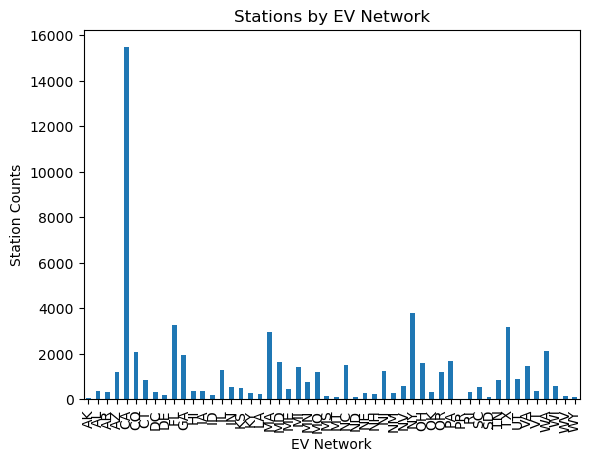

<Figure size 800x2200 with 0 Axes>

In [11]:
stations_by_network = full_and_clean.groupby(full_and_clean["State"])["Station Name"].count()
stations_by_network.plot(kind="bar")
plt.xlabel('EV Network')
plt.ylabel('Station Counts')
plt.title('Stations by EV Network')
plt.figure(figsize=(8,22))
plt.show()

In [12]:
charger_df = pd.read_csv("data/charger_data.csv")

In [13]:
charger_df.columns

Index([' Year ', ' EV Charging Ports ', ' Station Locations '], dtype='object')

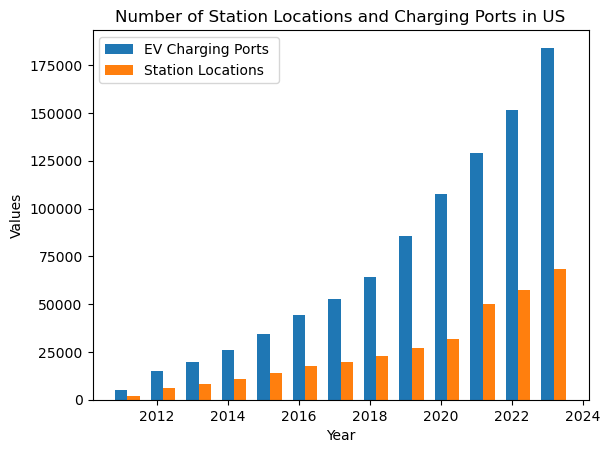

In [15]:
charger_df[' EV Charging Ports '] = charger_df[' EV Charging Ports '].str.replace(',', '')
charger_df[' Station Locations '] = charger_df[' Station Locations '].str.replace(',', '')
charger_df[' EV Charging Ports '] = pd.to_numeric(charger_df[' EV Charging Ports '])
charger_df[' Station Locations '] = pd.to_numeric(charger_df[' Station Locations '])
bar_width = 0.35
plt.bar(charger_df[' Year '], charger_df[' EV Charging Ports '], width=bar_width, label='EV Charging Ports ')
plt.bar(charger_df[' Year '] + bar_width, charger_df[' Station Locations '], width=bar_width, label='Station Locations ')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Number of Station Locations and Charging Ports in US')
plt.legend()

In [17]:
charger_df.to_csv("output/us_ev_stations.csv")

In [18]:
sales_df = pd.read_csv("data/sales_data.csv")

In [19]:
sales_df.columns

Index(['Vehicle', 'Type', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', 'Total'],
      dtype='object')

In [20]:
# Loop through the years
for i in range(2011, 2020):
    str_val = '{}'.format(i)
    # Remove non-numeric characters
    sales_df[str_val] = sales_df[str_val].replace(r'[^0-9]+', '', regex=True)
    # Replace empty strings with '0'
    sales_df[str_val] = sales_df[str_val].replace('', '0')

sales_df.head()

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,PHEV,7671,23461,23094,18805,15393,24739,20349,18306,4915,"156,733"
1,Nissan Leaf,EV,9674,9819,22610,30200,17269,14006,11230,14715,12365,"141,888"
2,Smart ED,EV,342,139,923,2594,1387,657,544,1219,680,"8,485"
3,Mitsubishi I EV,EV,76,588,1029,196,115,94,6,0,0,"2,104"
4,BMW Active E,EV,0,673,0,0,0,0,0,0,0,673


In [21]:
# Convert columns '2011' to '2019' to numeric
sales_df.loc[:, '2011':'2019'] = sales_df.loc[:, '2011':'2019'].apply(pd.to_numeric, errors='coerce')

# Recalculate "Total" by summing up data from columns '2011' to '2019'
sales_df['Total'] = sales_df.loc[:, '2011':'2019'].sum(axis=1)

# Now, columns '2011' to '2019' have been converted to numeric type, and "Total" has been recalculated based on the sum of these numeric columns
sales_df

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,PHEV,7671,23461,23094,18805,15393,24739,20349,18306,4915,156733
1,Nissan Leaf,EV,9674,9819,22610,30200,17269,14006,11230,14715,12365,141888
2,Smart ED,EV,342,139,923,2594,1387,657,544,1219,680,8485
3,Mitsubishi I EV,EV,76,588,1029,196,115,94,6,0,0,2104
4,BMW Active E,EV,0,673,0,0,0,0,0,0,0,673
5,Prius PHEV,PHEV,0,12749,12088,13264,4191,2474,20936,27595,23630,116927
6,Ford Focus EV,EV,0,683,1738,1964,1582,901,1817,560,0,9245
7,Honda Fit EV,EV,0,93,569,407,2,0,0,0,0,1071
8,Tesla Model S,EV,0,2400,19400,16750,26200,30200,26500,25745,15090,162285
9,Toyota RAV4 EV,EV,0,192,1005,1184,18,0,0,0,0,2399


In [26]:
sales_data = sales_df.dropna()
sales_data

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,PHEV,7671,23461,23094,18805,15393,24739,20349,18306,4915,156733
1,Nissan Leaf,EV,9674,9819,22610,30200,17269,14006,11230,14715,12365,141888
2,Smart ED,EV,342,139,923,2594,1387,657,544,1219,680,8485
3,Mitsubishi I EV,EV,76,588,1029,196,115,94,6,0,0,2104
4,BMW Active E,EV,0,673,0,0,0,0,0,0,0,673
5,Prius PHEV,PHEV,0,12749,12088,13264,4191,2474,20936,27595,23630,116927
6,Ford Focus EV,EV,0,683,1738,1964,1582,901,1817,560,0,9245
7,Honda Fit EV,EV,0,93,569,407,2,0,0,0,0,1071
8,Tesla Model S,EV,0,2400,19400,16750,26200,30200,26500,25745,15090,162285
9,Toyota RAV4 EV,EV,0,192,1005,1184,18,0,0,0,0,2399


In [27]:
sales_data.to_csv("output/ev_sales.csv")